<a href="https://colab.research.google.com/github/danlamberg/DS_AprendizadoMaquina/blob/main/Atividade_Regress%C3%A3o_Linear_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALUNO: DANIEL DE OLIVEIRA LAMBERG

RM: 12210919

TURMA: Data Science - Osório Sala 404 - QUA - 19:00 - 21:40

Exercícios:

Faça um filtro por cidades como Campinas, São Paulo, etc para encontrar notas com distribuições normais para comparação.
A nota de redação é uma forte candidata a distribuição normal conforme os exercícios das últimas aulas.
Para ter uma maior variabilidade teste o conjunto em cidades com mais de 40 entradas.
Teste a normalidade da coluna de NOTA_REDACAO (qqplot e teste de hipotese)
Nao e necessário o comentário em cada célula.
Utilize os conceitos de correlação para identificar possíveis variáveis para aplicar regressão linear simples.

## **Correlação e Regressão**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_enem = pd.read_csv('/content/drive/MyDrive/BSI/DATA SCIENCE/Colab Notebooks/Aula08/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')
df_enem

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,CONCLUSAO,ESCOLA,TREINEIRO,...,NOTA_MT,LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
0,"1,90E+11",Santa Isabel,22,M,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,600.2,ingles,sem_problemas,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",SÃ£o Paulo,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,privada,nao,...,731.8,ingles,sem_problemas,160.0,120.0,200.0,200.0,200.0,880.0,A
2,"1,90E+11",SÃ£o Bernardo do Campo,19,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,393.2,espanhol,sem_problemas,80.0,160.0,120.0,100.0,100.0,560.0,B
3,"1,90E+11",Embu-GuaÃ§u,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,419.2,ingles,sem_problemas,120.0,120.0,120.0,120.0,80.0,560.0,B
4,"1,90E+11",Guarulhos,23,F,solteiro(a),branca,brasileiro(a),ja_concluiu,nao_declarado,nao,...,796.1,ingles,sem_problemas,160.0,200.0,180.0,180.0,160.0,880.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581166,"1,90E+11",SÃ£o Paulo,18,F,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,479.1,espanhol,sem_problemas,100.0,120.0,120.0,140.0,100.0,580.0,B
581167,"1,90E+11",SÃ£o Paulo,17,F,solteiro(a),preta,brasileiro(a),conclui_2019,publica,nao,...,43.2,espanhol,sem_problemas,80.0,120.0,140.0,120.0,100.0,560.0,B
581168,"1,90E+11",SÃ£o Paulo,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,487.3,ingles,sem_problemas,120.0,80.0,60.0,120.0,0.0,380.0,B
581169,"1,90E+11",SÃ£o Paulo,17,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,401.1,ingles,sem_problemas,160.0,120.0,160.0,140.0,160.0,740.0,A


### Filtrando cidades

In [ ]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581171 entries, 0 to 581170
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   INSCRICAO             581171 non-null  object 
 1   MUNICIPIO_RESIDENCIA  581171 non-null  object 
 2   IDADE                 581171 non-null  int64  
 3   SEXO                  581171 non-null  object 
 4   ESTADO_CIVIL          581171 non-null  object 
 5   COR_RACA              581171 non-null  object 
 6   NACIONALIDADE         581171 non-null  object 
 7   CONCLUSAO             581171 non-null  object 
 8   ESCOLA                581171 non-null  object 
 9   TREINEIRO             581171 non-null  object 
 10  COD_ESCOLA            176894 non-null  float64
 11  PRESENCA_CN           581171 non-null  object 
 12  PRESENCA_CH           581171 non-null  object 
 13  PRESENCA_LC           581171 non-null  object 
 14  PRESENCA_MT           581171 non-null  object 
 15  

In [ ]:
enem_araras = df_enem.loc[df_enem.MUNICIPIO_RESIDENCIA == 'Araras']
enem_araras

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,CONCLUSAO,ESCOLA,TREINEIRO,...,NOTA_MT,LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
298,"1,90E+11",Araras,20,M,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,773.7,ingles,sem_problemas,160.0,120.0,160.0,180.0,160.0,780.0,B
358,"1,90E+11",Araras,18,F,solteiro(a),branca,brasileiro(a),conclui_2019,privada,nao,...,793.1,ingles,sem_problemas,180.0,200.0,200.0,200.0,180.0,960.0,B
603,"1,90E+11",Araras,30,F,solteiro(a),branca,brasileiro(a),ja_concluiu,nao_declarado,nao,...,408.7,espanhol,sem_problemas,120.0,120.0,120.0,100.0,120.0,580.0,B
667,"1,90E+11",Araras,27,F,solteiro(a),branca,brasileiro(a),ja_concluiu,nao_declarado,nao,...,693.3,ingles,sem_problemas,160.0,120.0,140.0,140.0,140.0,700.0,B
844,"1,90E+11",Araras,18,F,solteiro(a),preta,brasileiro(a),ja_concluiu,nao_declarado,nao,...,674.2,ingles,sem_problemas,160.0,200.0,180.0,180.0,160.0,880.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580416,"1,90E+11",Araras,17,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,444.7,ingles,sem_problemas,120.0,120.0,120.0,120.0,80.0,560.0,B
580620,"1,90E+11",Araras,18,F,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,456.6,ingles,sem_problemas,120.0,120.0,120.0,120.0,140.0,620.0,B
580669,"1,90E+11",Araras,18,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,685.8,espanhol,sem_problemas,140.0,180.0,120.0,120.0,160.0,720.0,B
580919,"1,90E+11",Araras,18,M,solteiro(a),branca,brasileiro(a),conclui_2019,publica,nao,...,507.7,ingles,sem_problemas,120.0,40.0,40.0,120.0,0.0,320.0,B


In [ ]:
enem_araras.shape

(1294, 28)

In [ ]:
print("Maior nota registrada: " + str(enem_araras['NOTA_MT'].max()))

Maior nota registrada: 896.1


In [ ]:
print("Menor nota registrada: " + str(enem_araras['NOTA_MT'].min()))

Menor nota registrada: 36.9


## Histograma

In [ ]:
import plotly.express as px
grafico =  px.histogram (enem_araras,  x = "NOTA_REDACAO", nbins=32, histnorm='percent',) 
grafico.update_layout(width=400,height=400,title_text='Distribuição de notas de Redação') 
grafico.show()

In [ ]:
import plotly.express as px
grafico =  px.histogram (enem_araras,  x = "NOTA_REDACAO", nbins=32, histnorm='percent',) 
grafico.update_layout(width=400,height=400,title_text='Nota') 
grafico.show()

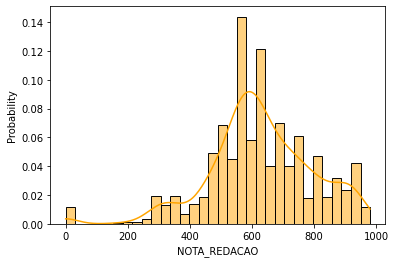

In [ ]:
import seaborn as sns
sns.histplot(enem_araras, x='NOTA_REDACAO', bins=32, color="orange", kde=True, stat="probability");

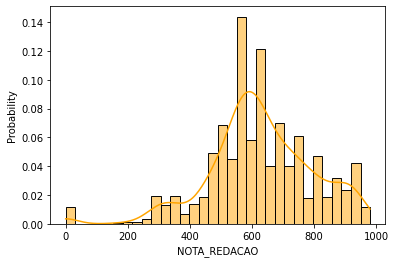

In [ ]:
sns.histplot(enem_araras, x='NOTA_REDACAO', bins=32, color="orange", kde=True, stat="probability");

## Teste de normalidade

In [ ]:
import matplotlib.pyplot as plt

QQPLOT

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

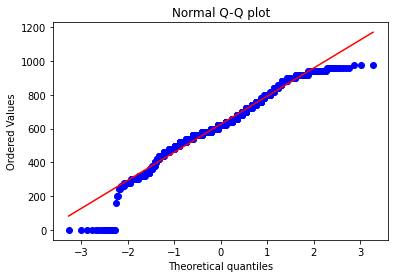

In [ ]:
stats.probplot(enem_araras['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

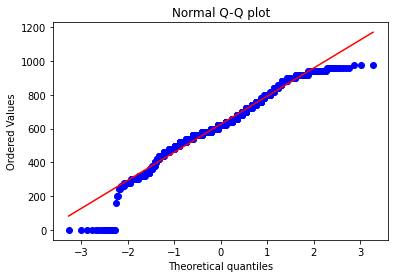

In [ ]:
stats.probplot(enem_araras['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

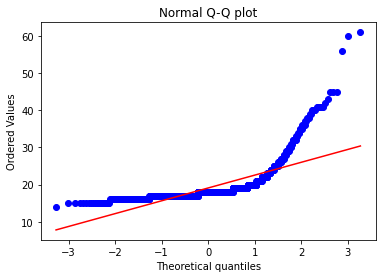

In [ ]:
stats.probplot(enem_araras['IDADE'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

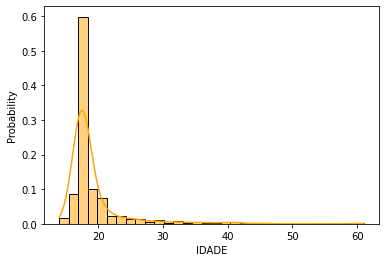

In [ ]:
sns.histplot(enem_araras, x='IDADE', bins=32, color="orange", kde=True, stat="probability");

## Gráfico de correlação

In [ ]:
import seaborn as sns


In [ ]:
colegiox = enem_araras.loc[enem_araras.MUNICIPIO_RESIDENCIA == 35017632.0]

In [ ]:
colegiox.shape

In [ ]:
nota_final = ['NOTA_CN','NOTA_CH','NOTA_MT','NOTA_LC', 'NOTA_REDACAO']

In [ ]:
colegiox['nota_final'] = (colegiox[nota_final].mean(axis=1))

In [ ]:
colegiox.head()

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,CONCLUSAO,ESCOLA,TREINEIRO,...,LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025,nota_final


In [ ]:
sns.pairplot(notas_colegiox)

NameError: ignored